# EDA and Preprocessing

## Setup

In [ ]:
# connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib notebook

In [ ]:
# load data
train_metadata = pd.read_csv('/content/drive/MyDrive/BINF_4008_Final_Project/Data/train_metadata.csv')
test_metadata = pd.read_csv('/content/drive/MyDrive/BINF_4008_Final_Project/Data/test_metadata.csv')

In [ ]:
# convert male column to binary
train_metadata['male'] = np.where(train_metadata['male'] == True, 1, 0)
test_metadata['male'] = np.where(test_metadata['male'] == True, 1, 0)

## Preprocess and Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the data and stratify on gender
train_metadata, val_metadata, y_train, y_val = train_test_split(train_metadata[['id', 'male']], train_metadata['boneage'],
                                                                test_size = 0.2, stratify = train_metadata['male'])

In [ ]:
# combine features with label
train_metadata = pd.concat([train_metadata, y_train], axis = 1)
val_metadata = pd.concat([val_metadata, y_val], axis = 1)

# set column names
test_metadata.columns = ['id', 'male', 'boneage']

# create column to identify the splits
train_metadata['split'] = 'train'
val_metadata['split'] = 'val'
test_metadata['split'] = 'test'

# reset indices
train_metadata = train_metadata.reset_index(drop = True)
val_metadata = val_metadata.reset_index(drop = True)
test_metadata = test_metadata.reset_index(drop = True)

In [ ]:
# check that no patient is in more than one split
assert set(train_metadata['id']) & set(val_metadata['id']) == set()
assert set(val_metadata['id']) & set(test_metadata['id']) == set()
assert set(train_metadata['id']) & set(test_metadata['id']) == set()

In [ ]:
# combine into one dataframe
all_metadata = pd.concat([train_metadata, val_metadata, test_metadata], axis = 0)

In [ ]:
all_metadata.head()

,id,male,boneage,split
0,14269,0,94,train
1,2109,1,156,train
2,1478,0,162,train
3,9681,1,180,train
4,6622,0,113,train


In [ ]:
# save data table
all_metadata.to_csv('/content/drive/MyDrive/BINF_4008_Final_Project/Data/metadata.csv', index = False)

## Combine Images into One Folder

In [ ]:
import os
import shutil

def combine_folders(source_folder1, source_folder2, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    dest_files = os.listdir(destination_folder)

    # Iterate through the files in source_folder1 and copy them to destination_folder
    for filename in os.listdir(source_folder1):

        if filename not in dest_files:

          source_path = os.path.join(source_folder1, filename)
          destination_path = os.path.join(destination_folder, filename)

          shutil.copy(source_path, destination_path)

    # Iterate through the files in source_folder2 and copy them to destination_folder
    for filename in os.listdir(source_folder2):

      if filename not in dest_files:

        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(destination_folder, filename)

        shutil.copy(source_path, destination_path)

In [ ]:
# combine images into one folder
combine_folders(source_folder1 = '/content/drive/MyDrive/BINF_4008_Final_Project/Data/test_dataset/',
                source_folder2 = '/content/drive/MyDrive/BINF_4008_Final_Project/Data/training_dataset/',
                destination_folder = '/content/drive/MyDrive/BINF_4008_Final_Project/Data/all_images/')

## EDA

In [ ]:
# load the metadata
metadata = pd.read_csv('/content/drive/MyDrive/BINF_4008_Final_Project/Data/metadata.csv')

In [ ]:
# extract the test data
test_data = metadata[metadata['split'] == 'test']

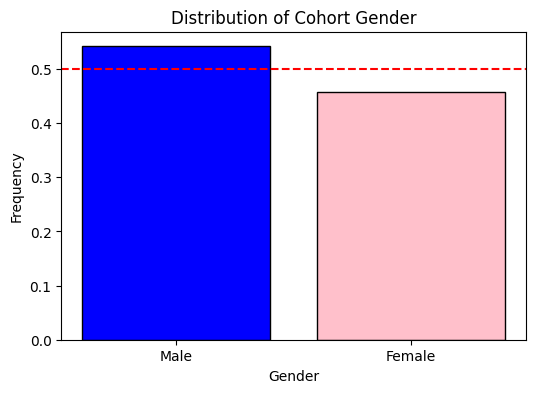

In [ ]:
# plot gender
plt.figure(figsize = (6, 4))

gender_frequency = metadata['male'].value_counts() / len(metadata)

plt.bar(range(2), height = gender_frequency.values, color = ['blue', 'pink'], edgecolor = 'black')
plt.axhline(y = 0.5, color = 'red', linestyle = 'dashed')

plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.title('Distribution of Cohort Gender')

plt.xticks(ticks = [0, 1], labels = ['Male', 'Female'])

plt.show()

# save plot
plt.savefig('/content/drive/MyDrive/BINF_4008_Final_Project/Plots/gender_distribution.png')

In [ ]:
# plot distribution of bone age
plt.figure(figsize = (6, 4))

plt.hist(metadata['boneage'].values, color = 'lightgrey', density = True, bins = 20, edgecolor = 'black')
sns.kdeplot(metadata['boneage'].values, color = 'red')

plt.xlabel('Bone Age (months)')
plt.ylabel('Density')

plt.title('Distribution of Cohort Bone Age')

plt.show()

# save plot
plt.savefig('/content/drive/MyDrive/BINF_4008_Final_Project/Plots/bone_age_distribution.png')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

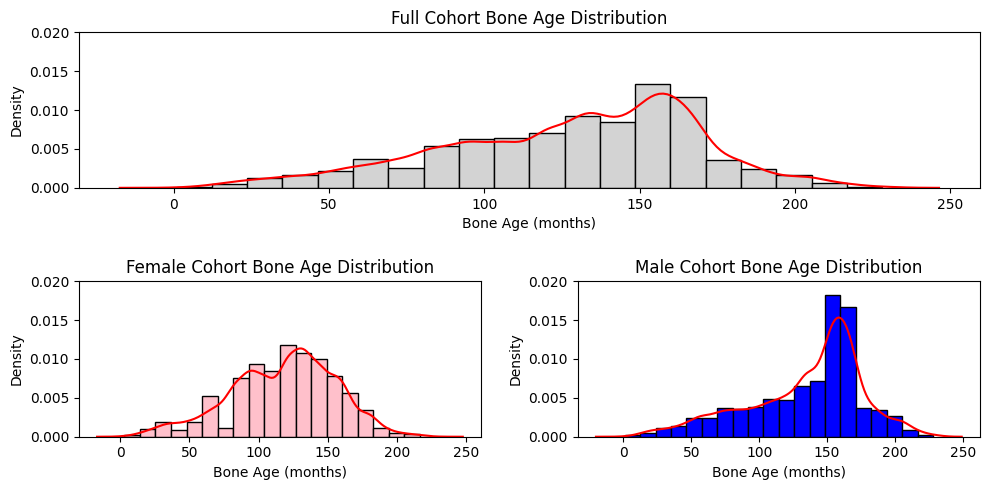

In [ ]:
# plot the overall bone age distribution and the distribution for male and female cohorts
fig = plt.figure(figsize = (10, 5))

metadata_f = metadata[metadata['male'] == 0]
metadata_m = metadata[metadata['male'] == 1]

gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0], sharey = ax1)
ax3 = fig.add_subplot(gs[1, 1], sharey = ax1)

ax1.hist(metadata['boneage'].values, color = 'lightgrey', density = True, bins = 20, edgecolor = 'black')
sns.kdeplot(metadata['boneage'].values, color = 'red', ax = ax1)

ax1.set_title('Full Cohort Bone Age Distribution')
ax1.set_xlabel('Bone Age (months)')

ax2.hist(metadata_f['boneage'].values, color = 'pink', density = True, bins = 20, edgecolor = 'black')
sns.kdeplot(metadata_f['boneage'].values, color = 'red', ax = ax2)

ax2.set_title('Female Cohort Bone Age Distribution')
ax2.set_xlabel('Bone Age (months)')

ax3.hist(metadata_m['boneage'].values, color = 'blue', density = True, bins = 20, edgecolor = 'black')
sns.kdeplot(metadata_m['boneage'].values, color = 'red', ax = ax3)

ax3.set_title('Male Cohort Bone Age Distribution')
ax3.set_xlabel('Bone Age (months)')

plt.tight_layout(h_pad = 2, w_pad = 2)

plt.ylim(0, 0.02)

plt.show()

# save figure
fig.savefig('/content/drive/MyDrive/BINF_4008_Final_Project/Plots/bone_age_distribution_m_f.png')

## Create Table One

In [ ]:
# install tabbleone library
!pip install tableone

In [ ]:
from tableone import TableOne

In [ ]:
# reorder the categories
df['Category'] = df['Category'].cat.reorder_categories(desired_order, ordered=True)

In [ ]:
tableone_metadata = metadata.copy()

# turn the binary gender variable into 'Male' and 'Female' strings
tableone_metadata['male'] = tableone_metadata['male'].replace({0: 'Female',
                                                               1: 'Male'})

# change the names of the split values
tableone_metadata['split'] = tableone_metadata['split'].replace({
    'train': 'Train Set',
    'val': 'Val Set',
    'test': 'Test Set'
})
# reorder the split categories
tableone_metadata['split'] = tableone_metadata['split'].astype('category').cat.reorder_categories(['Train Set', 'Val Set', 'Test Set'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# define variables for creating the table
cols_to_include = ['male', 'boneage', 'split']
categorical_cols = ['male', 'split']
groupby = ['split']
labels = {'male': 'Gender', 'boneage': 'Bone Age', 'split': 'Data Split'}

# create the Table 1
mytable = TableOne(tableone_metadata, columns = cols_to_include, categorical = categorical_cols, rename = labels, groupby = groupby, pval = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# print the latex code to create the table
print(mytable.tabulate(tablefmt = 'latex'))

\begin{tabular}{llllllll}
\hline
                     &           & Missing   & Overall      & Test Set     & Train Set     & Val Set      & P-Value   \\
\hline
 n                   &           &           & 14036        & 1425         & 10088         & 2523         &           \\
 Gender, n (\%)       & Female    & 0         & 6430 (45.8)  & 652 (45.8)   & 4622 (45.8)   & 1156 (45.8)  & 0.999     \\
                     & Male      &           & 7606 (54.2)  & 773 (54.2)   & 5466 (54.2)   & 1367 (54.2)  &           \\
 Bone Age, mean (SD) &           & 0         & 127.3 (41.2) & 127.2 (41.7) & 127.1 (41.2)  & 128.3 (41.0) & 0.375     \\
 Data Split, n (\%)   & Test Set  & 0         & 1425 (10.2)  & 1425 (100.0) &               &              & \ensuremath{<}0.001    \\
                     & Train Set &           & 10088 (71.9) &              & 10088 (100.0) &              &           \\
                     & Val Set   &           & 2523 (18.0)  &              &               & 2523 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
